In [2]:
try:
  from nlpcw.utils import get_dataset, show_random_elements
  import matplotlib.pyplot as plt
  import seaborn as sns
  from collections import Counter
  from itertools import combinations
  import numpy as np
  from transformers import AutoTokenizer
except:
  %pip install -q "git+https://github.com/cogniveon/nlpcw.git"

In [3]:
dataset, id2label, label2id, num_labels = get_dataset()
label_list = dataset["train"].features["ner_tags"].feature.names  # type: ignore
show_random_elements(dataset["train"])  # type: ignore

,tokens,ner_tags
0,"[To, generate, null, alleles, ,, we, sought, to, create, mutants, with, large, fragment, deletions, by, designing, 2, single, guide, RNAs, (, sgRNAs, ), within, or, flanking, the, stem, -, loop, region, (, Fig, 1B, ), .]","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O]"
1,"[HL, :, hyperlipidemia, Statistical, analyses, were, performed, using, logistic, regression, and, results, were, reported, as, odds, ratio, (, OR, ), and, 95, %, confidence, interval, (, 95, %, CI, ), .]","[B-AC, B-O, B-LF, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF, B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O]"
2,"[Analysis, of, the, molecular, dynamics, (, MD, ), trajectories, and, binding, free, energy, components, shed, light, into, understanding, the, mechanism, of, the, binding, specificity, of, the, Abl, SH3, domain, .]","[B-O, B-O, B-O, B-LF, I-LF, B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-AC, B-O, B-O]"
3,"[For, this, purpose, the, Gothenburg, Young, Persons, Empowerment, Scale, (, GYPES, ), was, developed, .]","[B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-LF, I-LF, B-O, B-AC, B-O, B-O, B-O, B-O]"
4,"[The, care, provided, by, skilled, health, care, professionals, to, pregnant, women, and, adolescent, girls, in, order, to, ensure, the, best, health, conditions, for, both, mother, and, baby, during, pregnancy, is, considered, Antenatal, care, (, ANC, ), [, 1, ], .]","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF, B-O, B-AC, B-O, B-O, B-O, B-O, B-O]"
5,"[The, pelvic, inlet, anterior, -, posterior, diameter, (, APD, ), ,, also, called, the, obstetric, conjugate, ,, was, measured, from, the, anterior, cortical, surface, of, the, sacrovertebral, angel, (, promontory, ), to, the, closest, point, on, the, convex, posterior, -, superior, aspect, of, the, pubis, symphysis, .]","[B-O, B-O, B-O, B-LF, I-LF, I-LF, I-LF, B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O]"
6,"[This, measurement, ,, which, only, evaluates, fixed, changes, ,, is, used, to, determine, selective, pressures, in, a, coding, region, ,, where, values, >, 1, suggest, positive, selection, ,, while, values, <, 1, indicate, purifying, selection, .]","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O]"
7,"[(, D, ), Overlaid, ,, enhanced, mean, intensity, images, before, and, after, (, E, ), the, alignment, algorithm, was, applied, .]","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O]"
8,"[More, recently, ,, several, PCP, pathway, components, ,, like, the, Wnt, receptor, Frizzled, (, Fz, ), ,, Flamingo, (, Fmi, ), ,, Strabismus, (, Stbm, or, Vang, ), ,, and, Dsh, ,, have, been, shown, to, play, a, role, in, the, correct, targeting, and, bifurcation, of, MB, axons, [, 4],[30],[31, ], .]","[B-O, B-O, B-O, B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, B-O, B-AC, B-O, B-O, B-LF, B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-AC, B-O, B-O, B-O, B-O, B-O]"
9,"[ATc, ,, anhydrotetracycline, ;, GCaMP6, ,, GFP, -, GFP, Calmodulin, -, M13, -, peptide-6, .]","[B-AC, B-O, B-LF, B-O, B-AC, B-O, B-LF, I-LF, B-AC, I-LF, I-LF, I-LF, I-LF, I-LF, B-O]"


In [4]:
example = dataset["train"][4]  # type: ignore
print(example["tokens"])
print(example["ner_tags"])

['Furthermore', ',', 'eNOS', '-', 'derived', 'NO', 'S', '-', 'nitrosylated', 'β', '-', 'actin', 'on', 'Cys374', 'and', 'impaired', 'actin', 'binding', 'to', 'profilin-1', '(', 'PFN1', ')', ',', 'as', 'confirmed', 'with', 'the', 'transnitrosylating', 'agent', 'S', '-', 'nitroso', '-', 'L', '-', 'cysteine', '(', 'Cys-NO', ')', '.']
[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 4, 0, 1, 0, 0]


In [5]:
tokenizer = AutoTokenizer.from_pretrained(
    "romainlhardy/roberta-large-finetuned-ner",
    add_prefix_space=True,
    clean_up_tokenization_spaces=True,
)

In [6]:
tokenized_input = tokenizer(example["tokens"], is_split_into_words=True)
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])  # type: ignore
print(tokens)

['<s>', 'ĠFurthermore', 'Ġ,', 'Ġe', 'N', 'OS', 'Ġ-', 'Ġderived', 'ĠNO', 'ĠS', 'Ġ-', 'Ġnit', 'ro', 'sy', 'lated', 'ĠÎ²', 'Ġ-', 'Ġact', 'in', 'Ġon', 'ĠC', 'ys', '374', 'Ġand', 'Ġimpaired', 'Ġact', 'in', 'Ġbinding', 'Ġto', 'Ġprof', 'il', 'in', '-', '1', 'Ġ(', 'ĠPF', 'N', '1', 'Ġ)', 'Ġ,', 'Ġas', 'Ġconfirmed', 'Ġwith', 'Ġthe', 'Ġtrans', 'nit', 'ro', 'sy', 'l', 'ating', 'Ġagent', 'ĠS', 'Ġ-', 'Ġnit', 'ro', 'so', 'Ġ-', 'ĠL', 'Ġ-', 'Ġcy', 'ste', 'ine', 'Ġ(', 'ĠC', 'ys', '-', 'NO', 'Ġ)', 'Ġ.', '</s>']


In [7]:
print(len(example[f"ner_tags"]), example[f"ner_tags"])
print(len(tokenized_input["input_ids"]), tokenized_input["input_ids"])  # type: ignore


41 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 4, 0, 1, 0, 0]
70 [0, 9870, 2156, 364, 487, 3196, 111, 16934, 8228, 208, 111, 23737, 1001, 8628, 32914, 47743, 111, 1760, 179, 15, 230, 2459, 35208, 8, 15241, 1760, 179, 17014, 7, 8546, 718, 179, 12, 134, 36, 13914, 487, 134, 4839, 2156, 25, 1474, 19, 5, 6214, 39290, 1001, 8628, 462, 1295, 2936, 208, 111, 23737, 1001, 2527, 111, 226, 111, 19258, 6526, 833, 36, 230, 2459, 12, 13449, 4839, 479, 2]


In [8]:
word_ids = tokenized_input.word_ids()
aligned_labels = [-100 if i is None else example[f"ner_tags"][i] for i in word_ids]

print(len(aligned_labels), aligned_labels)
print(len(tokenized_input["input_ids"]), tokenized_input["input_ids"])  # type: ignore


70 [-100, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 1, 1, 1, 0, 0, -100]
70 [0, 9870, 2156, 364, 487, 3196, 111, 16934, 8228, 208, 111, 23737, 1001, 8628, 32914, 47743, 111, 1760, 179, 15, 230, 2459, 35208, 8, 15241, 1760, 179, 17014, 7, 8546, 718, 179, 12, 134, 36, 13914, 487, 134, 4839, 2156, 25, 1474, 19, 5, 6214, 39290, 1001, 8628, 462, 1295, 2936, 208, 111, 23737, 1001, 2527, 111, 226, 111, 19258, 6526, 833, 36, 230, 2459, 12, 13449, 4839, 479, 2]


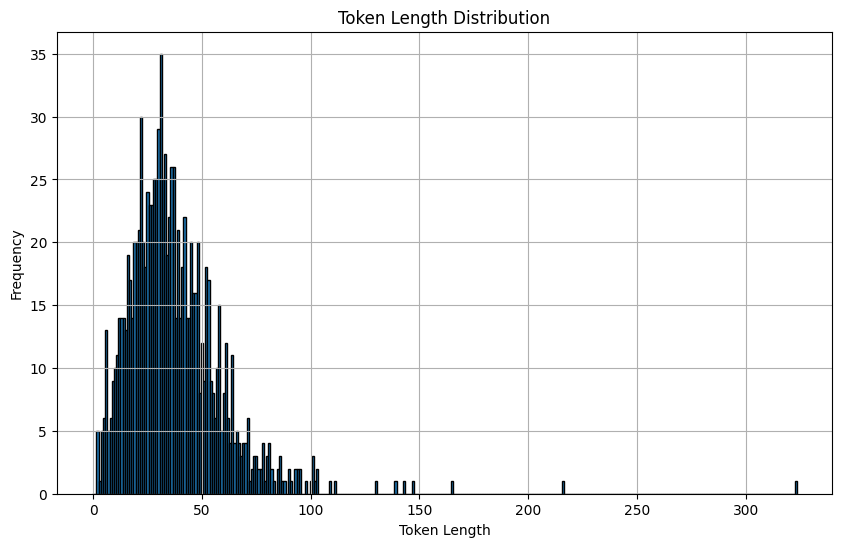

In [9]:
token_lengths = [len(tokens) for tokens in dataset['train']['tokens']]

plt.figure(figsize=(10, 6))
plt.hist(token_lengths, bins=np.arange(0, max(token_lengths) + 2) - 0.5, edgecolor='black')
plt.title('Token Length Distribution')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

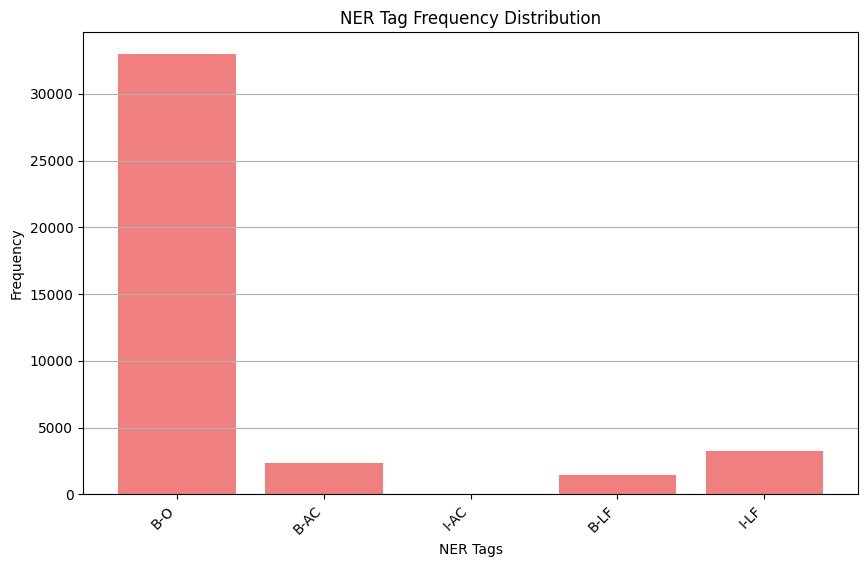

In [10]:
all_ner_tags = [tag for tags in dataset['train']['ner_tags'] for tag in tags]

tag_counts = Counter(all_ner_tags)
tag_counts_full = {label: tag_counts.get(i, 0) for i, label in enumerate(label_list)}

plt.figure(figsize=(10, 6))
plt.bar(tag_counts_full.keys(), tag_counts_full.values(), color='lightcoral')
plt.title('NER Tag Frequency Distribution')
plt.xlabel('NER Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

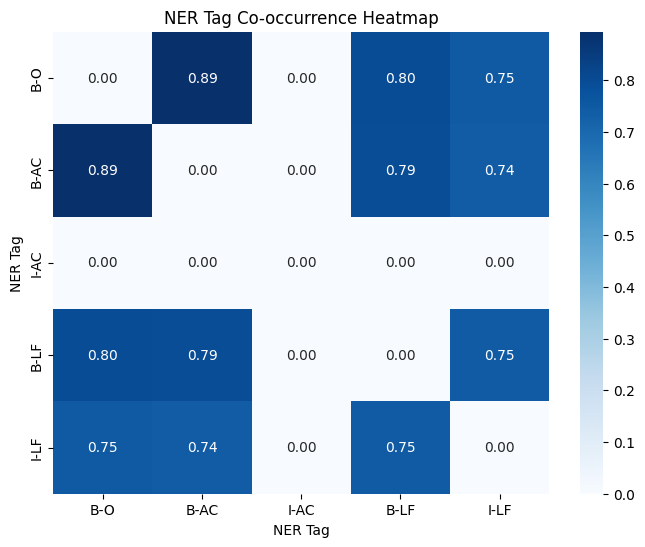

In [11]:
co_occurrence_matrix = np.zeros((num_labels, num_labels))

# Count co-occurrences
for tags in dataset['train']['ner_tags']:
    for tag1, tag2 in combinations(set(tags), 2):
        co_occurrence_matrix[tag1, tag2] += 1
        co_occurrence_matrix[tag2, tag1] += 1

co_occurrence_matrix /= len(dataset['train']['ner_tags'])

plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence_matrix, xticklabels=label_list, yticklabels=label_list, cmap='Blues', annot=True, fmt=".2f")
plt.title('NER Tag Co-occurrence Heatmap')
plt.xlabel('NER Tag')
plt.ylabel('NER Tag')
plt.show()

/var/folders/0n/cb45_pmj3f90sjqkdcpkwcgw0000gn/T/ipykernel_51572/1831204510.py:7: RuntimeWarning: invalid value encountered in divide
  transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)


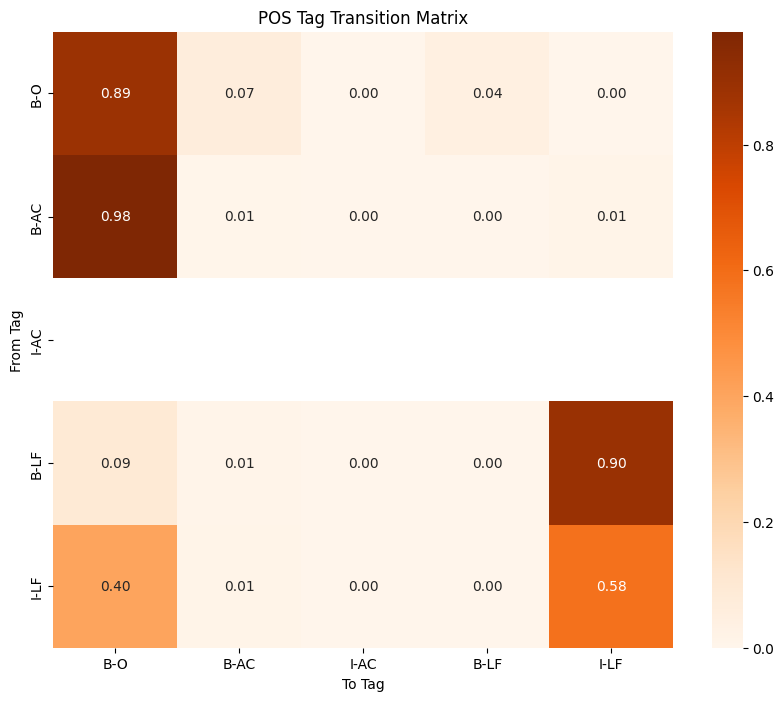

In [12]:
transition_matrix = np.zeros((num_labels, num_labels))

for tags in dataset['train']['ner_tags']:
    for (tag1, tag2) in zip(tags[:-1], tags[1:]):
        transition_matrix[tag1, tag2] += 1

transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix, xticklabels=label_list, yticklabels=label_list, cmap='Oranges', annot=True, fmt=".2f")
plt.title('POS Tag Transition Matrix')
plt.xlabel('To Tag')
plt.ylabel('From Tag')
plt.show()

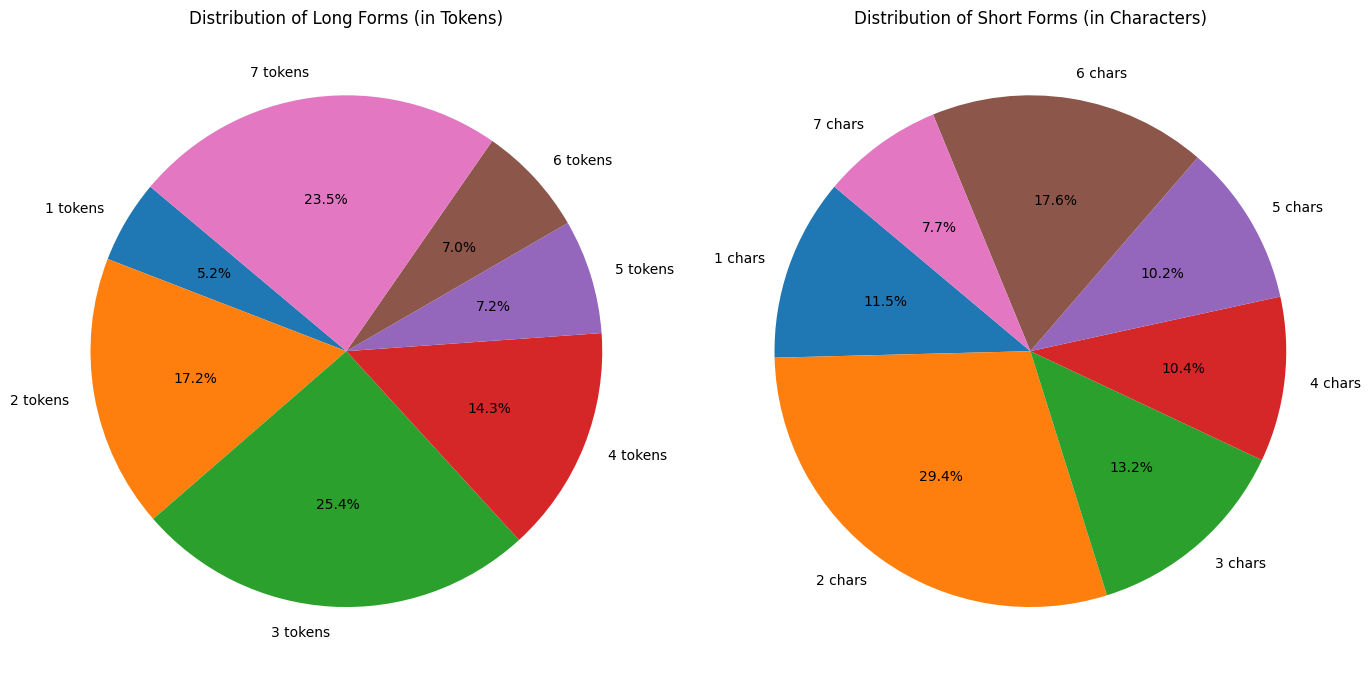

In [13]:
long_form_lengths = [
    len([tag for tag in ner_tags if label_list[tag] == 'B-LF' or label_list[tag] == 'I-LF'])
    for ner_tags in dataset['train']['ner_tags']
]
long_form_lengths = [length for length in long_form_lengths if length > 0]

short_form_lengths = [
    len(" ".join([tokens[i] for i, tag in enumerate(ner_tags) if label_list[tag] == 'B-AC' or label_list[tag] == 'I-AC']))
    for tokens, ner_tags in zip(dataset['train']['tokens'], dataset['train']['ner_tags'])
]
short_form_lengths = [length for length in short_form_lengths if length > 0]

long_bins = [1, 2, 3, 4, 5, 6, 7]
short_bins = [1, 2, 3, 4, 5, 6, 7]

long_form_counts = [sum(1 for length in long_form_lengths if length == b or (b == long_bins[-1] and length >= b)) for b in long_bins]
short_form_counts = [sum(1 for length in short_form_lengths if b < length <= b + 1) for b in short_bins]

long_labels = [f'{b} tokens' for b in long_bins]
short_labels = [f'{b} chars' for b in short_bins]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.pie(long_form_counts, labels=long_labels, autopct='%1.1f%%', startangle=140)
ax1.set_title('Distribution of Long Forms (in Tokens)')

ax2.pie(short_form_counts, labels=short_labels, autopct='%1.1f%%', startangle=140)
ax2.set_title('Distribution of Short Forms (in Characters)')

plt.tight_layout()
plt.show()